<a href="https://colab.research.google.com/github/jiehyunjkim/cs480student/blob/main/01/CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

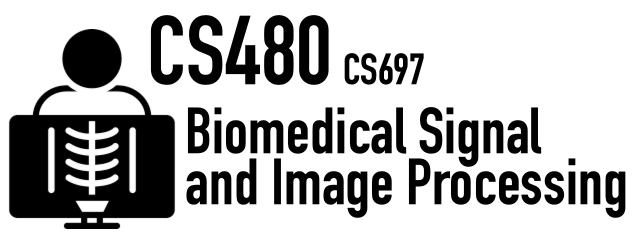
# Assignment 1


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [3]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [ ]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

In [4]:
firstsecond = ecg[0:SAMPLING_RATE] #the first 360 values of the ecg signal

In [5]:
secondsecond = ecg[1*SAMPLING_RATE:2*SAMPLING_RATE] #the 2nd second of the ecg signal

In [6]:
thridsecond = ecg[2*SAMPLING_RATE:3*SAMPLING_RATE] #the 3nd second of the ecg signal

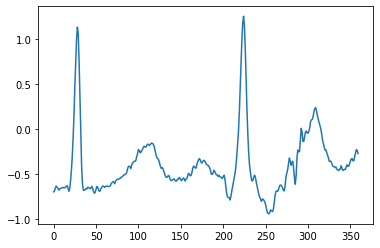

In [7]:
plt.plot(thridsecond)

In [8]:
from9to11 = ecg[8*SAMPLING_RATE:11*SAMPLING_RATE]

Text(0, 0.5, 'ECG [v]')

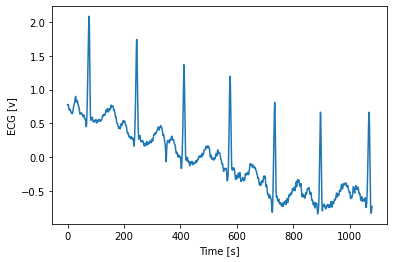

In [9]:
plt.plot(from9to11)
plt.xlabel("Time [s]")
plt.ylabel("ECG [v]")

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [10]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [11]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 1.1 MB 15.8 MB/s 


In [12]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [13]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


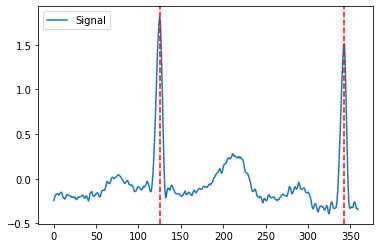

In [14]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

In [ ]:
#from9to11_extend = ecg[8*SAMPLING_RATE:11*SAMPLING_RATE]

In [15]:
_, rpeaks = nk.ecg_peaks(from9to11, sampling_rate=SAMPLING_RATE)

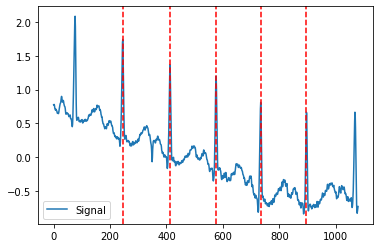

In [16]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], from9to11)

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [17]:
#time = np.arange(ecg.size) / SAMPLING_RATE
time = ecg.size / SAMPLING_RATE

In [ ]:
time

300.0

In [18]:
num_rpeak = rpeaks['ECG_R_Peaks'].size

In [ ]:
num_rpeak

5

In [19]:
heart_rate = time / num_rpeak

In [20]:
heart_rate

60.0

Since normal heart rate is between 60 to 100 beats per minutes, this patient who has heart rate of 60 beats per minutes is in regular range.

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

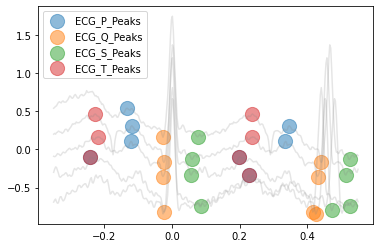

In [21]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes

_, waves_peak = nk.ecg_delineate(from9to11, rpeaks, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')

In [ ]:
# TODO Does the detection work well?

Yes.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

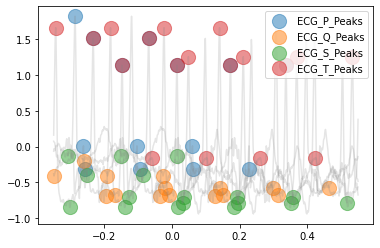

In [22]:
_, waves_peak = nk.ecg_delineate(ecg, rpeaks['ECG_R_Peaks'][:5], sampling_rate= 1000, method="peak", show=True, show_type='peaks')

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

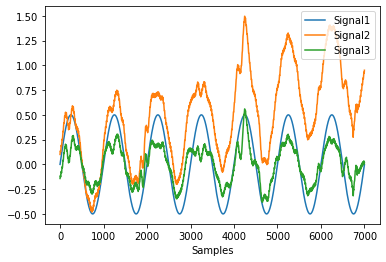

In [23]:
# Generate original signal
original = nk.signal_simulate(duration=7, frequency=1)

# Distort the signal (add noise, linear trend, artifacts etc.)
distorted = nk.signal_distort(original,
                              noise_amplitude=0.1,
                              noise_frequency=[5, 10, 20],
                              powerline_amplitude=0.05,
                              artifacts_amplitude=0.3,
                              artifacts_number=3,
                              linear_drift=0.5)

# Clean (filter and detrend)
cleaned = nk.signal_detrend(distorted)
cleaned = nk.signal_filter(cleaned, lowcut=1, highcut=100)

# Compare the 3 signals
plot = nk.signal_plot([original, distorted, cleaned])

In [ ]:
# TODO Does the filtering improve the result?

In [ ]:
Yes.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#